# Runner

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

activites:

* date: date of the activity
* duration: duration of the activity in minutes
* distance: distance of the activity in km

In [2]:
activities = [
    {
        'date': '01-01-2023',
        'duration': 64,
        'distance': 7.45,
    },
    {
        'date': '14-01-2023',
        'duration': 27,
        'distance': 2.84,
    },
    {
        'date': '17-01-2023',
        'duration': 25,
        'distance': 3.05,
    },
    {
        'date': '21-01-2023',
        'duration': 26,
        'distance': 3.17,
    },
    {
        'date': '24-01-2023',
        'duration': 98,
        'distance': 9.12,
    },
    {
        'date': '28-01-2023',
        'duration': 45,
        'distance': 5.0,
    },
    {
        'date': '29-01-2023',
        'duration': 26,
        'distance': 5.13,
    },
    {
        'date': '05-02-2023',
        'duration': 50,
        'distance': 3.77,
    },
    {
        'date': '08-02-2023',
        'duration': 32,
        'distance': 4.05,
    },
    {
        'date': '11-02-2023',
        'duration': 31,
        'distance': 4.09,
    },
    {
        'date': '12-02-2023',
        'duration': 60,
        'distance': 6.30,
    },
]


In [3]:
df = pd.DataFrame(activities)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df['year'] = df['date'].dt.isocalendar().year
df['week'] = df['date'].dt.isocalendar().week

df = df.set_index('date')

df

,duration,distance,year,week
date,,,,
2023-01-01,64,7.45,2022,52
2023-01-14,27,2.84,2023,2
2023-01-17,25,3.05,2023,3
2023-01-21,26,3.17,2023,3
2023-01-24,98,9.12,2023,4
2023-01-28,45,5.00,2023,4
2023-01-29,26,5.13,2023,4
2023-02-05,50,3.77,2023,5
2023-02-08,32,4.05,2023,6


In [4]:
y2023 = df[df['year'] == 2023]
weeks = y2023[['week', 'duration', 'distance']].copy()
weeks.set_index('week')

weeks

,week,duration,distance
date,,,
2023-01-14,2,27,2.84
2023-01-17,3,25,3.05
2023-01-21,3,26,3.17
2023-01-24,4,98,9.12
2023-01-28,4,45,5.00
2023-01-29,4,26,5.13
2023-02-05,5,50,3.77
2023-02-08,6,32,4.05
2023-02-11,6,31,4.09


In [5]:
sums = weeks.groupby('week').aggregate({
    'duration': 'sum',
    'distance': 'sum',
})

sums

,duration,distance
week,,
2,27,2.84
3,51,6.22
4,169,19.25
5,50,3.77
6,123,14.44


## 2023: Duration (min) / week

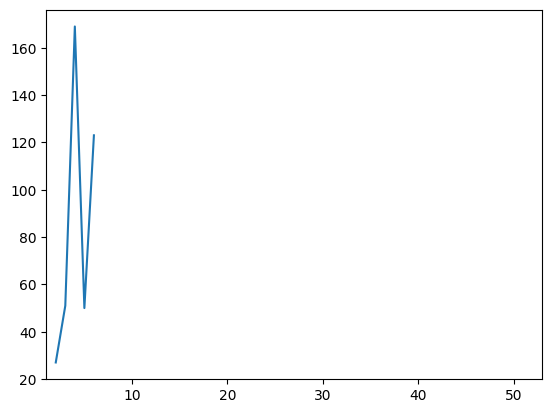

In [6]:
plt.xlim(1, 53)
plt.plot(sums.duration)
plt.show()

## 2023: Distance (km) / week

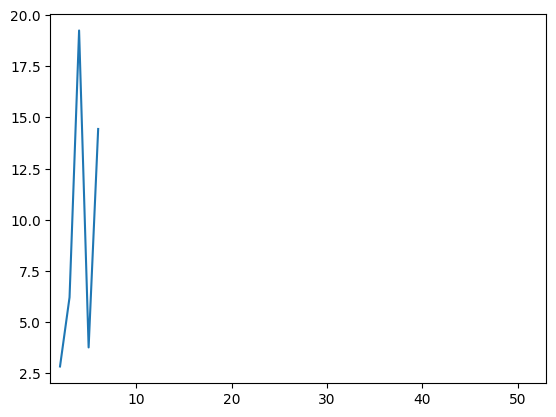

In [7]:
plt.xlim(1, 53)
plt.plot(sums.distance)
plt.show()